# Titanic Dataset Analysis & Visualization
This notebook performs analysis and visualization on the Titanic dataset, preparing it for machine learning in a separate notebook.

# Titanic Sample Data Analysis
This notebook is your starter template for basic data exploration.

In [ ]:
#import sys
#!{sys.executable} -m pip install seaborn --upgrade
#!pip install seaborn==0.11.0
#print(seaborn.__version__)
#!pip install --upgrade seaborn

In [1]:
# Load the dataset
#file_path = 'titanic_sample_manual.csv'  # Ensure the CSV is in the same folder
file_path = 'train.csv'
df = pd.read_csv(file_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Load and Explore the Dataset

In [2]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# Describe numeric columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Age analysis
df['Age'].plot(kind='kde', figsize=(14,6))
print("mean:",df['Age'].mean())

mean: 29.69911764705882


<AxesSubplot:>

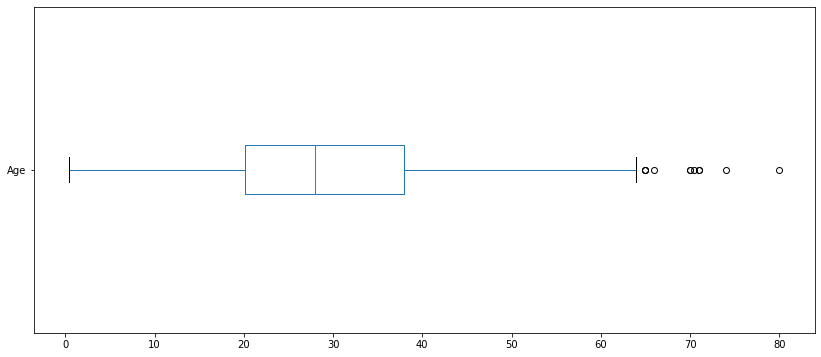

In [6]:
df['Age'].plot(kind='box', vert=False, figsize=(14,6))

<AxesSubplot:ylabel='Pclass'>

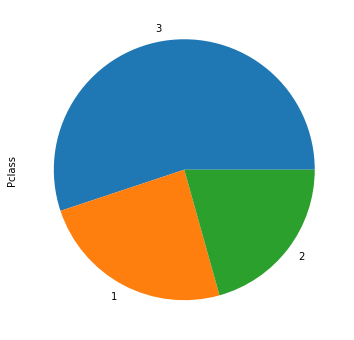

In [8]:
# Class
df['Pclass'].unique()
df['Pclass'].value_counts().plot(kind='pie', figsize=(6,6))

<AxesSubplot:title={'center':'Passenger Class Distribution'}, ylabel='Pclass'>

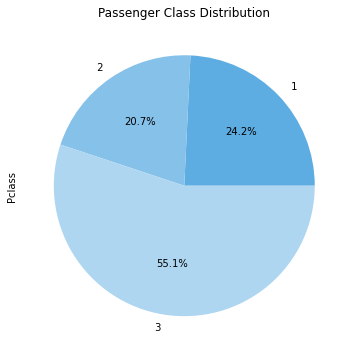

In [9]:
#colors = ['#FFD1DC', '#AEC6CF', '#77DD77'] # soft pink, blue, green
#colors = ['#FF6F61', '#6B5B95', '#88B04B'] # coral, purple, green
#colors = ['#D35400', '#E67E22', '#F39C12'] # burnt orange, amber, yellow-orange
colors = ['#5DADE2', '#85C1E9', '#AED6F1']  # different shades of blue
df['Pclass'].value_counts().sort_index().plot(
    kind='pie', 
    figsize=(6,6), 
    autopct='%1.1f%%', 
    labels=[' 1', ' 2', ' 3'],
    colors=colors,
    title='Passenger Class Distribution'
)

In [10]:
# Sex
df['Sex'].unique()
#df['Sex'].plot(kind='pie', figsize=(6,6))

array(['male', 'female'], dtype=object)

In [11]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:title={'center':'Survival Distribution'}, ylabel='Survived'>

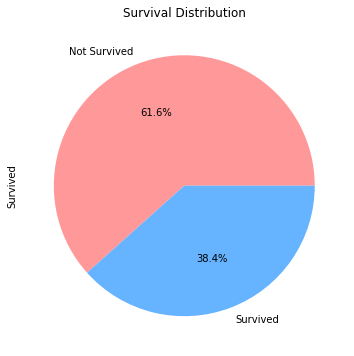

In [13]:
colors = ['#ff9999','#66b3ff']
labels = ['Not Survived', 'Survived']

df['Survived'].value_counts().sort_index().plot(
    kind='pie',
    autopct='%1.1f%%',
    labels=labels,
    colors=colors,
    figsize=(6, 6),
    title='Survival Distribution'
)

## 2. Data Cleaning and Feature Engineering

In [14]:
# Check for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

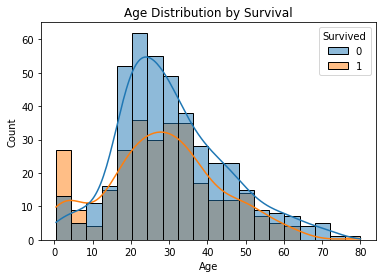

In [15]:
#survival by age

import matplotlib.pyplot as plt
import seaborn as sns

# Plot survival by age
sns.histplot(data=df, x='Age', hue='Survived', kde=True)
plt.title('Age Distribution by Survival')
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='count'>

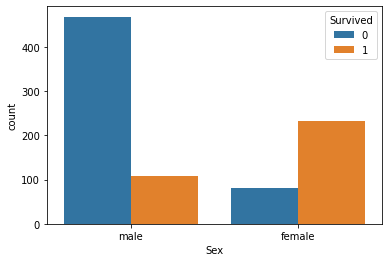

In [16]:
#Survival by Sex

sns.countplot(x='Sex', hue='Survived', data=df)

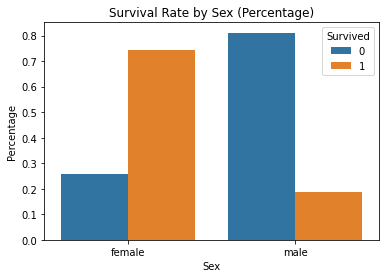

In [17]:
#Survival by Sex (percentage)

import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate percentages
percent_df = (
    df.groupby('Sex')['Survived']
    .value_counts(normalize=True)
    .rename('Percentage')
    .reset_index()
)

# Step 2: Plot
sns.barplot(
    x='Sex', 
    y='Percentage', 
    hue='Survived', 
    data=percent_df
)
plt.title('Survival Rate by Sex (Percentage)')
plt.ylabel('Percentage')
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

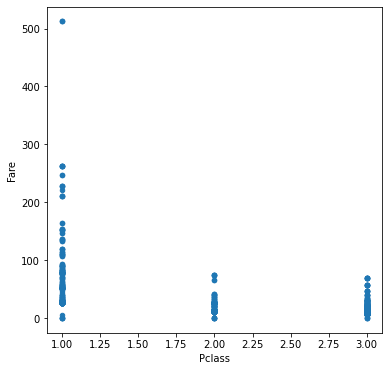

In [18]:
df.plot(kind='scatter', x='Pclass', y='Fare', figsize=(6,6))

In [19]:
# Group by Pclass and calculate survival rate
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

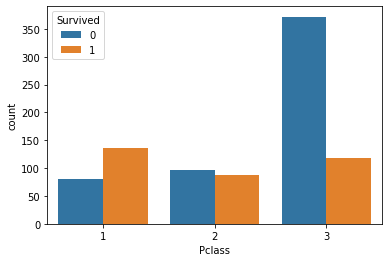

In [20]:
#Survival by Pclass
sns.countplot(x='Pclass', hue='Survived', data=df)

In [21]:
#Adding Familysize column to df
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

## 3. Visualizations

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [23]:
#Adding IsAlone column to df
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


In [27]:
#Adding age_group column to df
def age_group(age):
    if age <= 12:
        return 'Child'
    elif age <= 19:
        return 'Teenager'
    elif age <= 35:
        return 'Young Adult'
    elif age <= 55:
        return 'Adult'
    else:
        return 'Senior'

df['AgeGroup'] = df['Age'].apply(age_group)

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,Young Adult


<AxesSubplot:xlabel='AgeGroup', ylabel='Survived'>

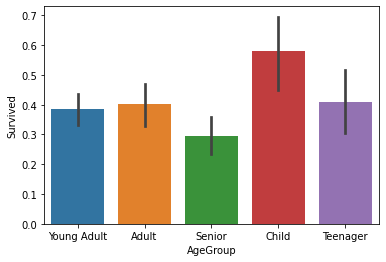

In [29]:
sns.barplot(x='AgeGroup', y='Survived', data=df)

<AxesSubplot:xlabel='IsAlone', ylabel='Survived'>

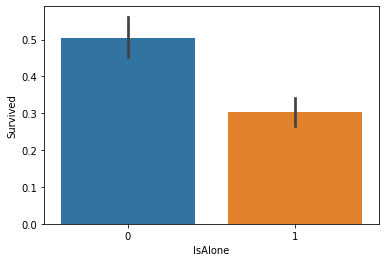

In [30]:
sns.barplot(x='IsAlone', y='Survived', data=df)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

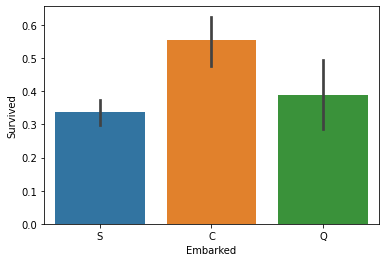

In [31]:
sns.barplot(x='Embarked', y='Survived', data=df)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

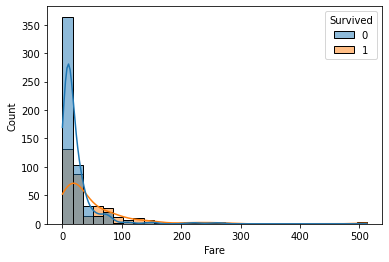

In [32]:
sns.histplot(data=df, x='Fare', hue='Survived', kde=True, bins=30)

<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

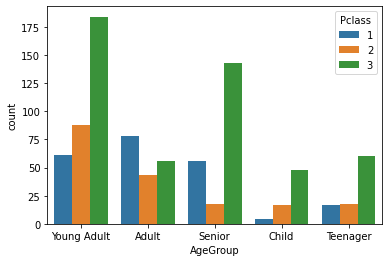

In [33]:
sns.countplot(x='AgeGroup', hue='Pclass', data=df)

Text(0.5, 1.0, 'Distribution of Pclass within Age Groups')

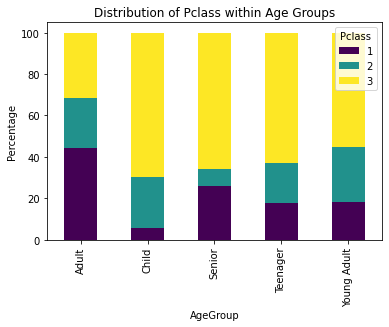

In [34]:
age_class = pd.crosstab(df['AgeGroup'], df['Pclass'], normalize='index') * 100
age_class.plot(kind='bar', stacked=True, colormap='viridis')
plt.ylabel('Percentage')
plt.title('Distribution of Pclass within Age Groups')

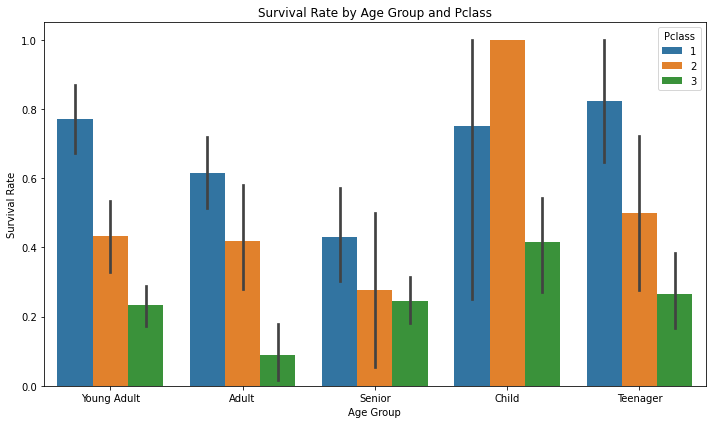

In [36]:
# Set figure size
plt.figure(figsize=(10, 6))

# Grouped bar chart
sns.barplot(data=df, x='AgeGroup', y='Survived', hue='Pclass')

plt.title('Survival Rate by Age Group and Pclass')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')
plt.legend(title='Pclass')
plt.tight_layout()
plt.show()

## 4. Correlation Heatmap and Insights

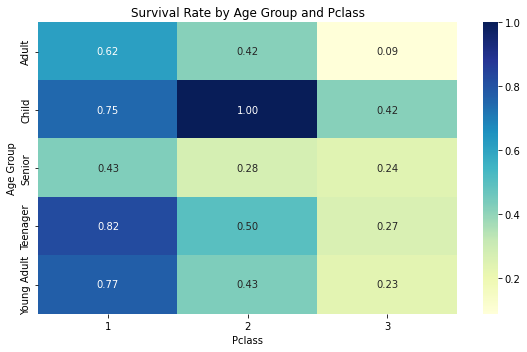

In [37]:
# Calculate survival rate by AgeGroup and Pclass
survival_matrix = df.groupby(['AgeGroup', 'Pclass'])['Survived'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(survival_matrix, annot=True, cmap='YlGnBu', fmt='.2f')

plt.title('Survival Rate by Age Group and Pclass')
plt.ylabel('Age Group')
plt.xlabel('Pclass')
plt.tight_layout()
plt.show()

In [ ]:
#getting ready for correlation heatmap!
#Dropping unuseful columns, make others as numerical

# Drop columns
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Age', 'Embarked'], axis=1)

# Convert categorical to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['AgeGroup'] = df['AgeGroup'].map({
    'Child': 0,
    'Teenager': 1,
    'Young Adult': 2,
    'Adult': 3,
    'Senior': 4
})

In [41]:
df.head()

,Survived,Pclass,Sex,Fare,FamilySize,IsAlone,AgeGroup
0,0,3,0,7.2500,2,0,2
1,1,1,1,71.2833,2,0,3
2,1,3,1,7.9250,1,1,2
3,1,1,1,53.1000,2,0,2
4,0,3,0,8.0500,1,1,2


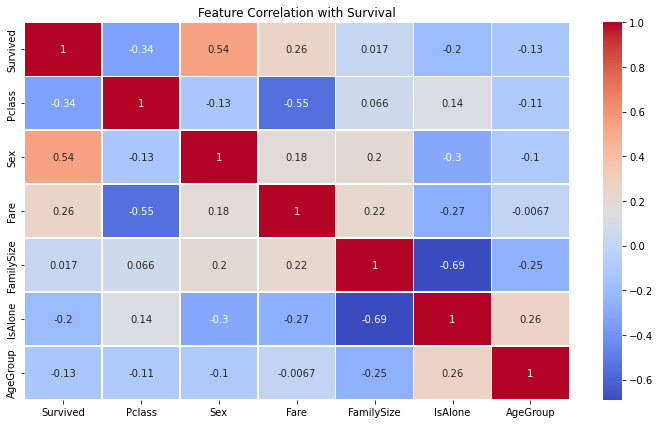

In [42]:
# Select only numeric columns manually
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Feature Correlation with Survival')
plt.tight_layout()
plt.show()

In [43]:
# Heatmap Correlation Insights
# Sex has the highest positive correlation with survival (0.54) – indicating that being female increased the chances of survival.

# Pclass has a moderate negative correlation with survival (-0.34) – higher classes (1st) had higher survival rates.

# Fare shows a slight positive correlation (0.26) – passengers who paid more were more likely to survive.

# IsAlone and FamilySize show weaker correlations, but being alone slightly decreased survival odds (-0.20).

# AgeGroup has minimal correlation (-0.13) – indicating age alone wasn't strongly predictive of survival.



## 5. Save Cleaned Dataset for ML

In [45]:
# Save the final cleaned dataframe to CSV
df.to_csv('titanic_cleaned.csv', index=False)